# **Preprocesamiento de series de tiempo**

Con la finalidad de introducción al preprocesamiento de series de tiempo realice las siguientes actividades:


1. Seleccione un dataset que contenga al menos tres series de tiempo.
2. Realice el preprocesamiento adecuado para cada una de esas series de tiempo, por ejemplo, interpole valores nulos, revise la varianza, etc.
3. Vuelva estacionarias las series del tiempo utilizado el método de diferenciación.
4. Con el uso de scatterplots busque relaciones no lineales de una variable con sigo misma según el análisis y su entendimiento del problema se lo indique. Los valores de los lags deben poder variar.
5. Grafique la ACF (Correlograma) para cada serie de tiempo. Los valores de lags a mostrar deben poder variar.

In [ ]:
#librerias a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
#Lectura del archivo
#ClimaOriginal = pd.read_csv("/content/TempDiaria.csv", sep=",")
clima = pd.read_csv("/content/TempDiaria.csv", sep=",")
print(clima.head(10))

clima_diferenciado = clima.copy()


         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03        NaN        NaN    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000           NaN
5  2013-01-06   7.000000  82.800000    1.480000   1018.000000
6  2013-01-07   7.000000        NaN    6.300000   1020.000000
7  2013-01-08   8.857143  63.714286    7.142857   1018.714286
8  2013-01-09  14.000000  51.250000         NaN   1017.000000
9  2013-01-10  11.000000  62.000000    7.400000   1015.666667


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Eliminación de los valores Nan mediante interpolación lineal
clima = clima.interpolate(method = "linear")

In [ ]:
"""
#Centrado y escalado
columnas_a_escalas = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
datos_a_escalas = clima[columnas_a_escalas]
escalador = StandardScaler()
datos_escalados = escalador.fit_transform(datos_a_escalas)
df_escalado = pd.DataFrame(datos_escalados, columns=columnas_a_escalas)
#print(df_escalado)"""

"\n#Centrado y escalado\ncolumnas_a_escalas = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']\ndatos_a_escalas = clima[columnas_a_escalas]\nescalador = StandardScaler()\ndatos_escalados = escalador.fit_transform(datos_a_escalas)\ndf_escalado = pd.DataFrame(datos_escalados, columns=columnas_a_escalas)\n#print(df_escalado)"

In [ ]:
#estabilizacion de la varianza
clima['wind_speed'] = clima['wind_speed'] .where(clima['wind_speed']  != 0, 1)
columnas_var = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
clima[columnas_var] = clima[columnas_var].apply(lambda x: np.log(x))

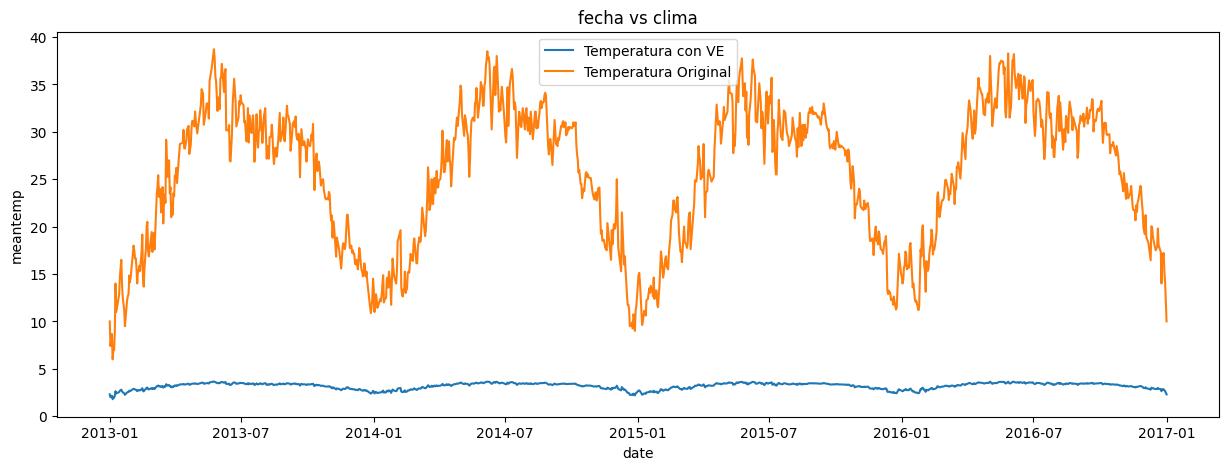

In [ ]:
clima['date'] = pd.to_datetime(clima['date'])
ClimaOriginal['date'] = pd.to_datetime(ClimaOriginal['date'])
_fig_, _axs_ = plt.subplots(nrows = 1, figsize = (15, 5))
_fig_.subplots_adjust(hspace = 0.3, wspace = 0.3)
_axs_.set(title = "fecha vs clima")
_ = sns.lineplot(x = clima["date"], y = clima['meantemp'], label = "Temperatura con VE", ax = _axs_)
_ = sns.lineplot(x = ClimaOriginal["date"], y = ClimaOriginal['meantemp'], label = "Temperatura Original")

In [ ]:
#diferenciacion
clima_diferenciado = clima.diff().dropna()
#clima_diferenciado[columnas_var] = clima_diferenciado[columnas_var].apply(lambda x: x.diff())
clima_diferenciado[columnas_var] = clima_diferenciado[columnas_var].apply(lambda x: x.pct_change())


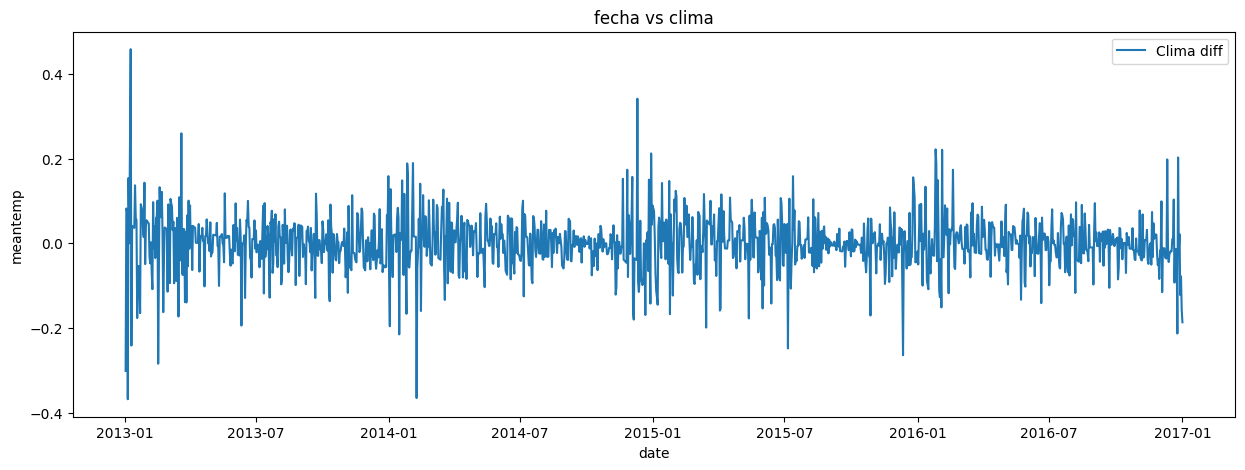

In [ ]:
clima['date'] = pd.to_datetime(clima['date'])
ClimaOriginal['date'] = pd.to_datetime(ClimaOriginal['date'])
_fig_, _axs_ = plt.subplots(nrows = 1, figsize = (15, 5))
_fig_.subplots_adjust(hspace = 0.3, wspace = 0.3)
_axs_.set(title = "fecha vs clima")
#_ = sns.lineplot(x = clima["date"], y = clima['meantemp'], label = "Temperatura con VE", ax = _axs_)
_ = sns.lineplot(x = clima["date"], y = clima_diferenciado['meantemp'], label = "Clima diff")

In [ ]:
t = 1/365
clima_diferenciado_2 = clima.diff() / t


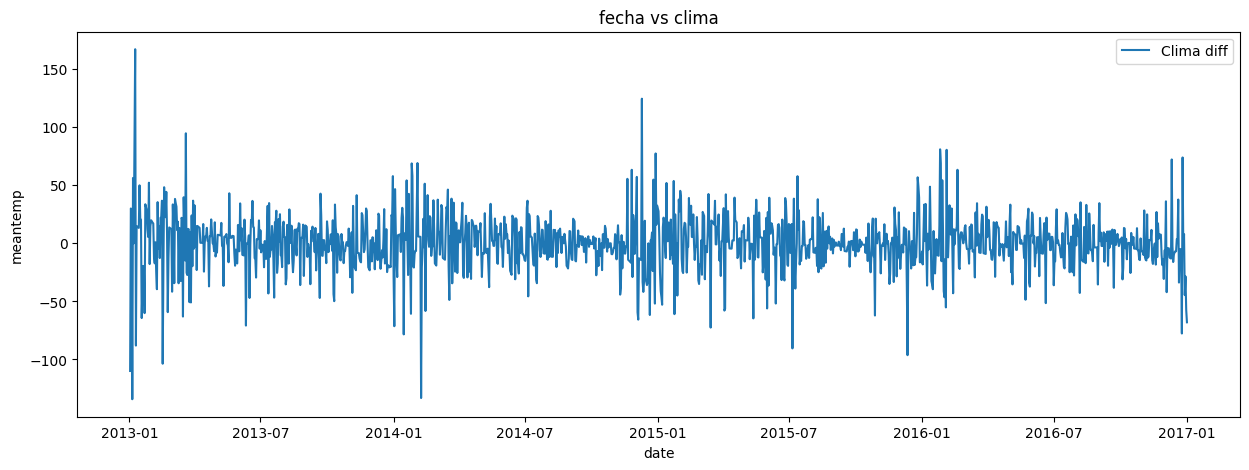

In [ ]:
clima['date'] = pd.to_datetime(clima['date'])
ClimaOriginal['date'] = pd.to_datetime(ClimaOriginal['date'])
_fig_, _axs_ = plt.subplots(nrows = 1, figsize = (15, 5))
_fig_.subplots_adjust(hspace = 0.3, wspace = 0.3)
_axs_.set(title = "fecha vs clima")
#_ = sns.lineplot(x = clima["date"], y = clima['meantemp'], label = "Temperatura con VE", ax = _axs_)
_ = sns.lineplot(x = clima["date"], y = clima_diferenciado_2['meantemp'], label = "Clima diff")

In [ ]:
meant = list(clima['meantemp'])
diff_3 = []
for i in range(365,len(meant)):
  aux = meant[i] - meant[i - 365]
  diff_3.append(aux)

tiempo = clima["date"][365: ]

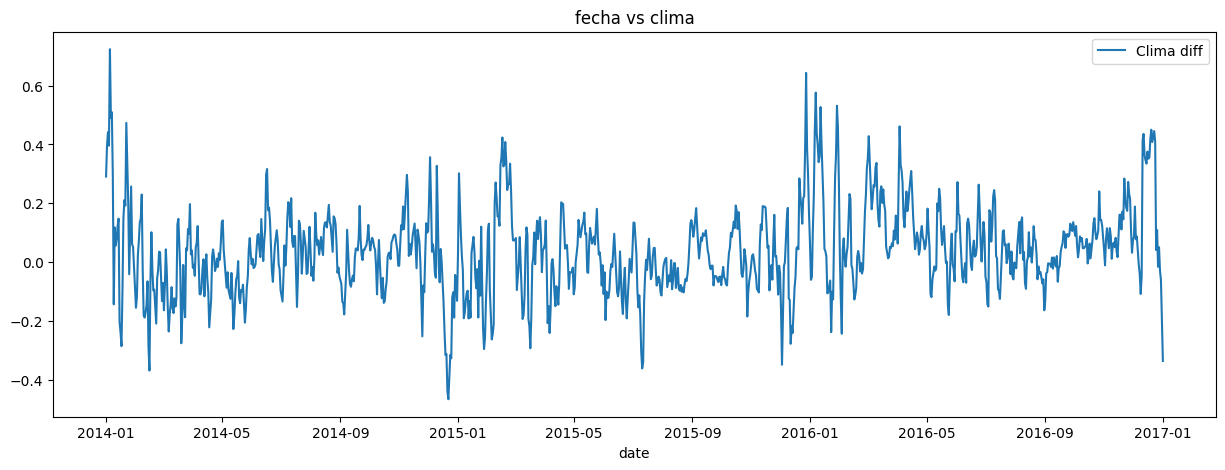

In [ ]:
clima['date'] = pd.to_datetime(clima['date'])
ClimaOriginal['date'] = pd.to_datetime(ClimaOriginal['date'])
_fig_, _axs_ = plt.subplots(nrows = 1, figsize = (15, 5))
_fig_.subplots_adjust(hspace = 0.3, wspace = 0.3)
_axs_.set(title = "fecha vs clima")
#_ = sns.lineplot(x = clima["date"], y = clima['meantemp'], label = "Temperatura con VE", ax = _axs_)
_ = sns.lineplot(x = tiempo, y =diff_3, label = "Clima diff")

In [ ]:
dsv_meantem = np.std(clima_diferenciado['meantemp'])
print(dsv_meantem)

0.06309494529679678


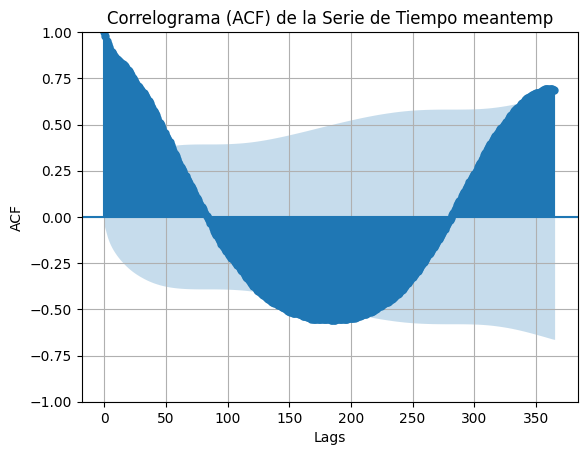

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(serie_temporal_diferenciada, lags=20)
plot_acf(clima['meantemp'], lags = 365)
plt.title('Correlograma (ACF) de la Serie de Tiempo meantemp')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

In [ ]:
dsv_humidity = np.std(clima_diferenciado['humidity'])
print(dsv_humidity)

0.12708864551483706


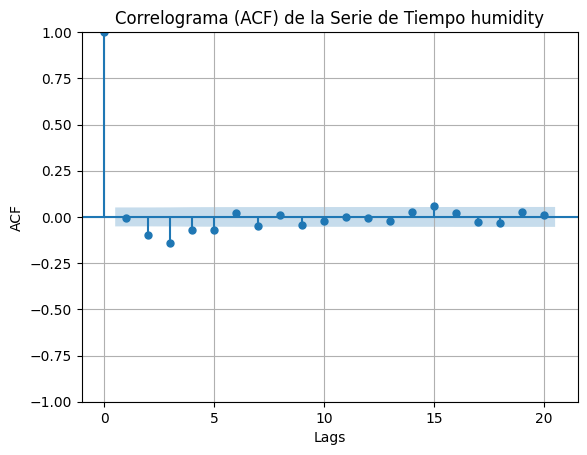

In [ ]:
plot_acf(clima_diferenciado['humidity'], lags = 20)
plt.title('Correlograma (ACF) de la Serie de Tiempo humidity')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

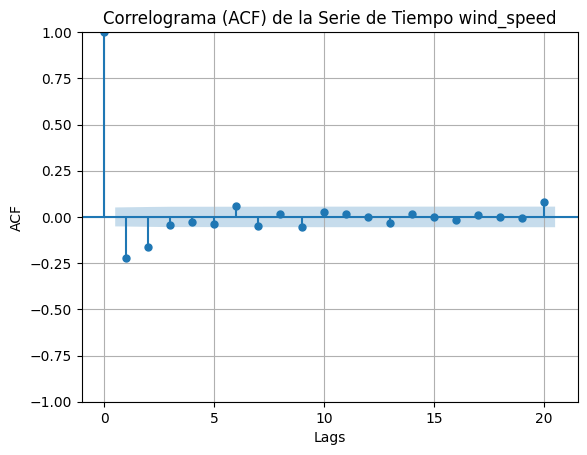

In [ ]:
plot_acf(clima_diferenciado['wind_speed'], lags = 20)
plt.title('Correlograma (ACF) de la Serie de Tiempo wind_speed')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

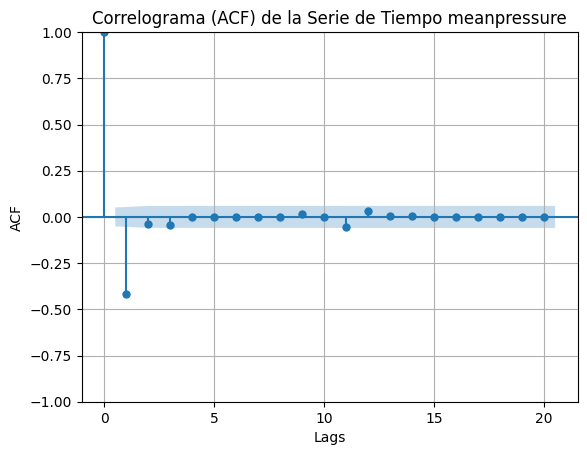

In [ ]:
plot_acf(clima_diferenciado['meanpressure'], lags = 20)
plt.title('Correlograma (ACF) de la Serie de Tiempo meanpressure')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

Relaciones no lineales

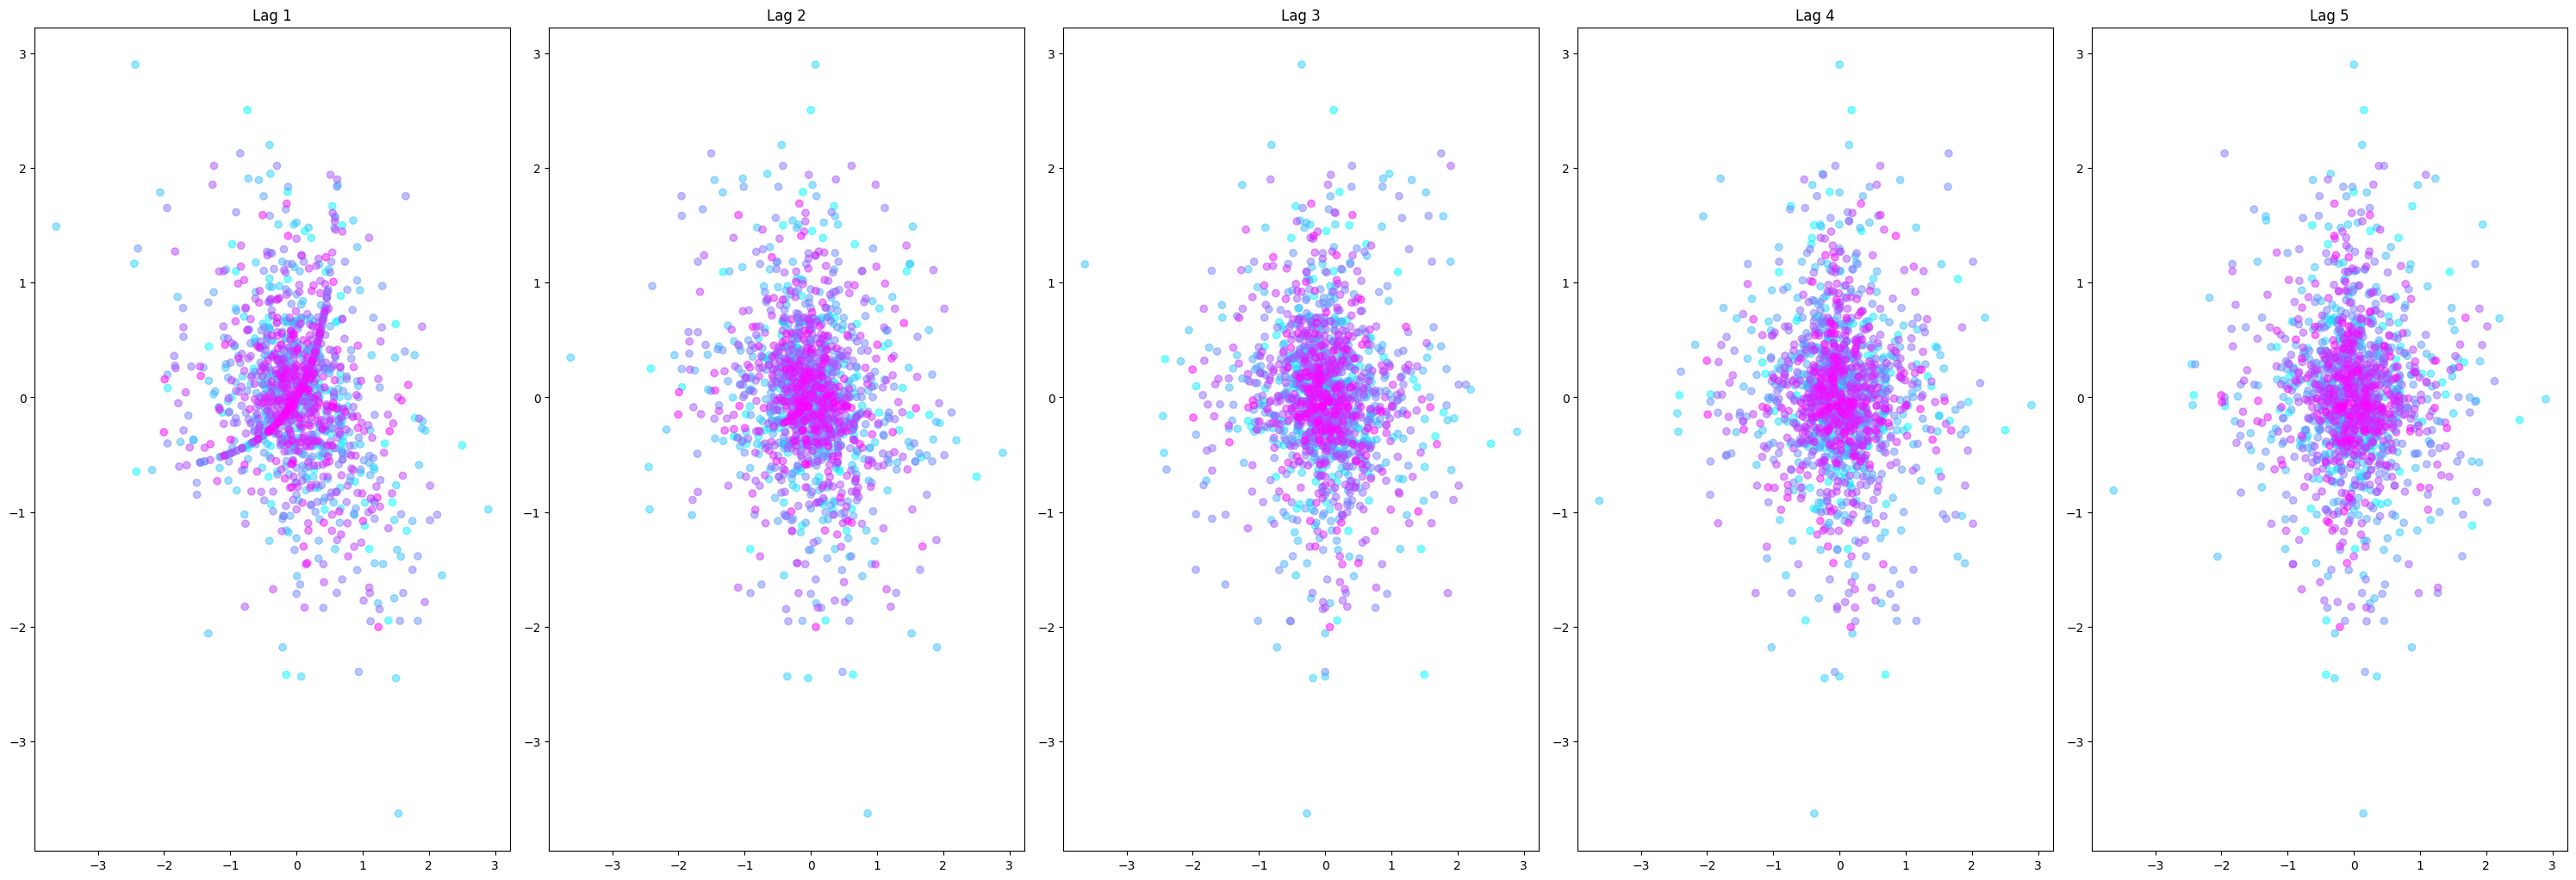

In [ ]:
# Ajusta el tamaño de la figura
plt.figure(figsize=(30, 30))
# Define cantidad de lags
cantidad_lag = 5
# Iteramos lags y creamos plots
for lag in range(1, cantidad_lag + 1):
    # Crea una nueva columna con el lag correspondiente
    clima_diferenciado['lag_{}'.format(lag)] = clima_diferenciado['wind_speed'].shift(lag)



    # Crea un scatterplot para el lag actual
    plt.subplot(3, cantidad_lag, lag)
    plt.scatter(clima_diferenciado['wind_speed'], clima_diferenciado['lag_{}'.format(lag)] ,c=np.arange(len(clima_diferenciado)),cmap= "cool", alpha=0.5)
    plt.title('Lag {}'.format(lag))

#Espacios
plt.tight_layout()
plt.show()

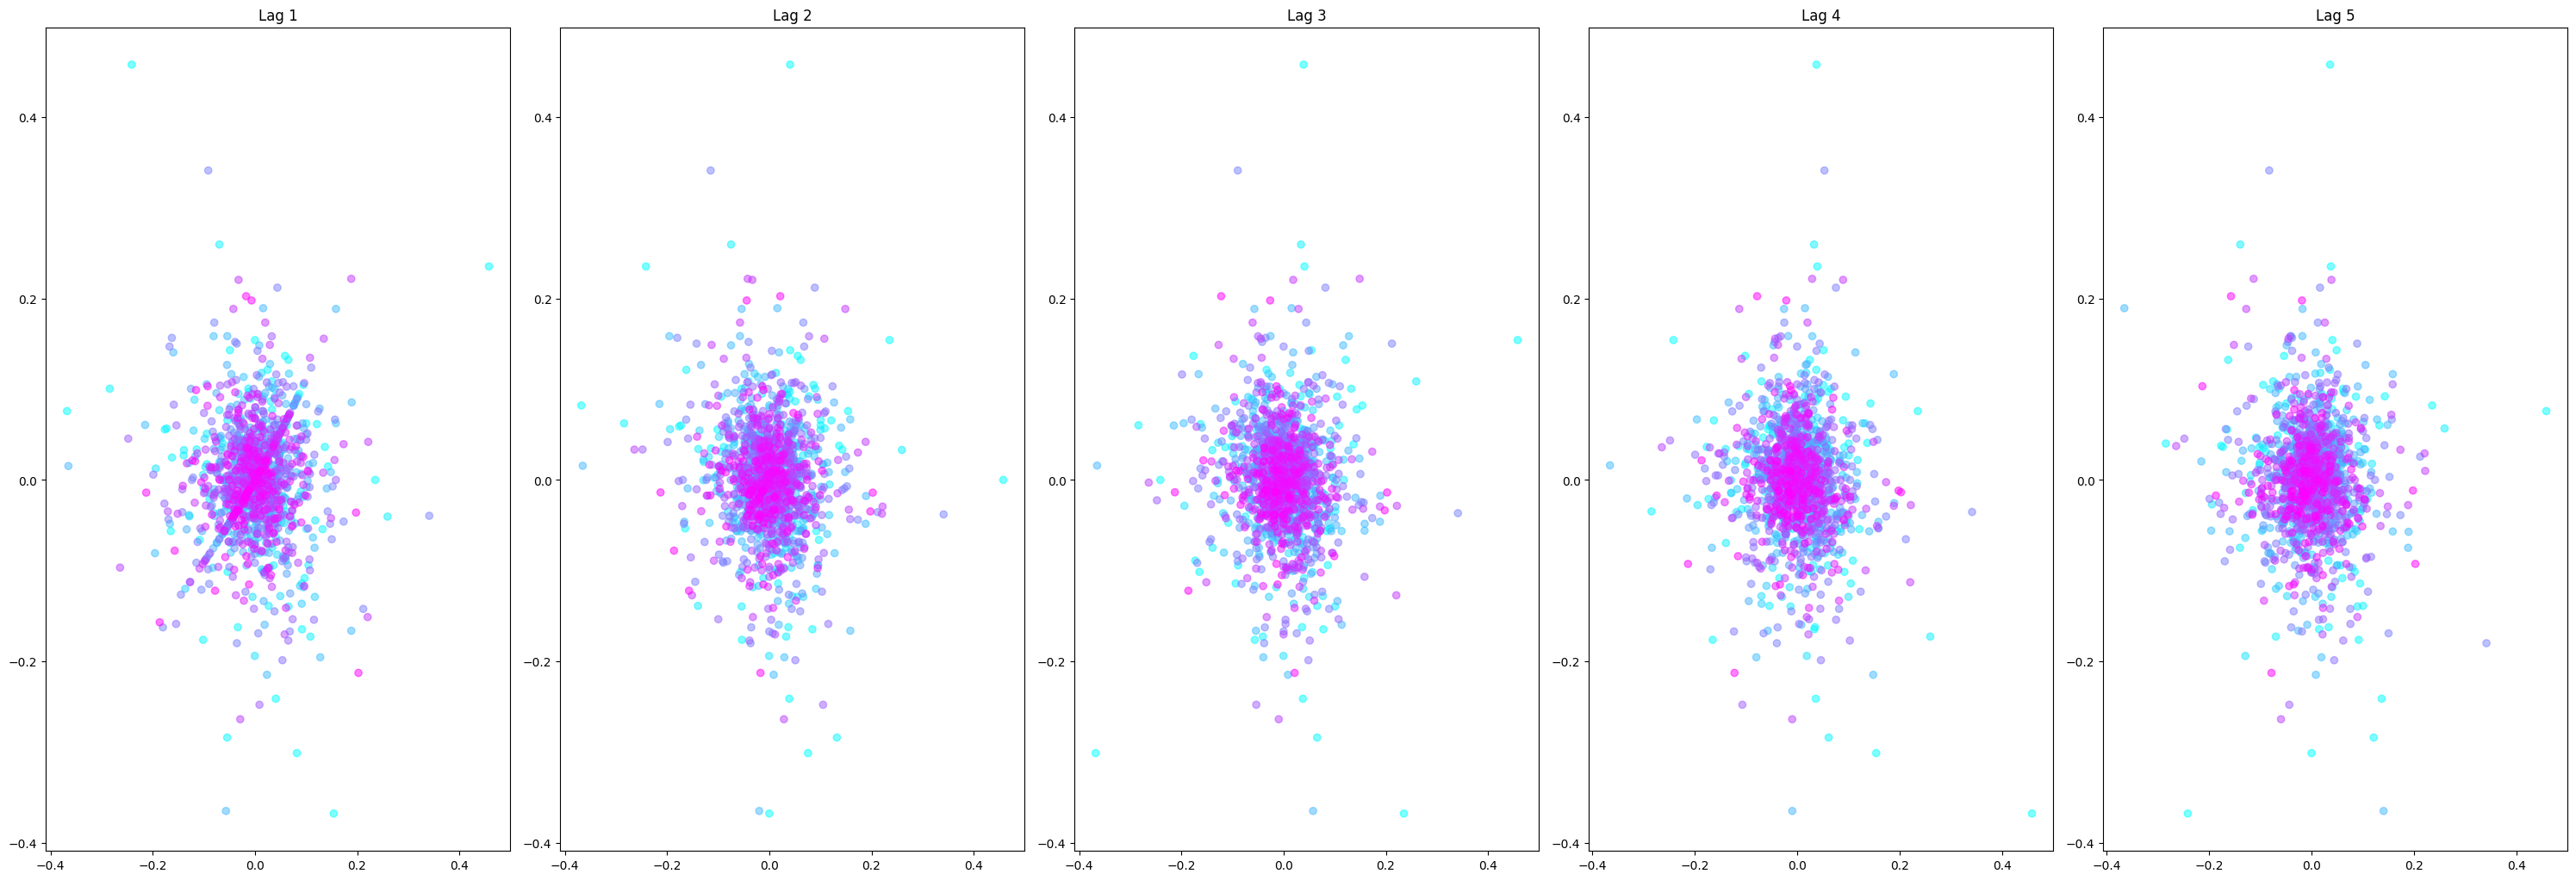

In [ ]:
# Ajusta el tamaño de la figura
plt.figure(figsize=(30, 30))
# Define cantidad de lags
cantidad_lag = 5
# Iteramos lags y creamos plots
for lag in range(1, cantidad_lag + 1):
    # Crea una nueva columna con el lag correspondiente
    clima_diferenciado['lag_{}'.format(lag)] = clima_diferenciado['meantemp'].shift(lag)



    # Crea un scatterplot para el lag actual
    plt.subplot(3, cantidad_lag, lag)
    plt.scatter(clima_diferenciado['meantemp'], clima_diferenciado['lag_{}'.format(lag)] ,c=np.arange(len(clima_diferenciado)),cmap= "cool", alpha=0.5)
    plt.title('Lag {}'.format(lag))

#Espacios
plt.tight_layout()
plt.show()

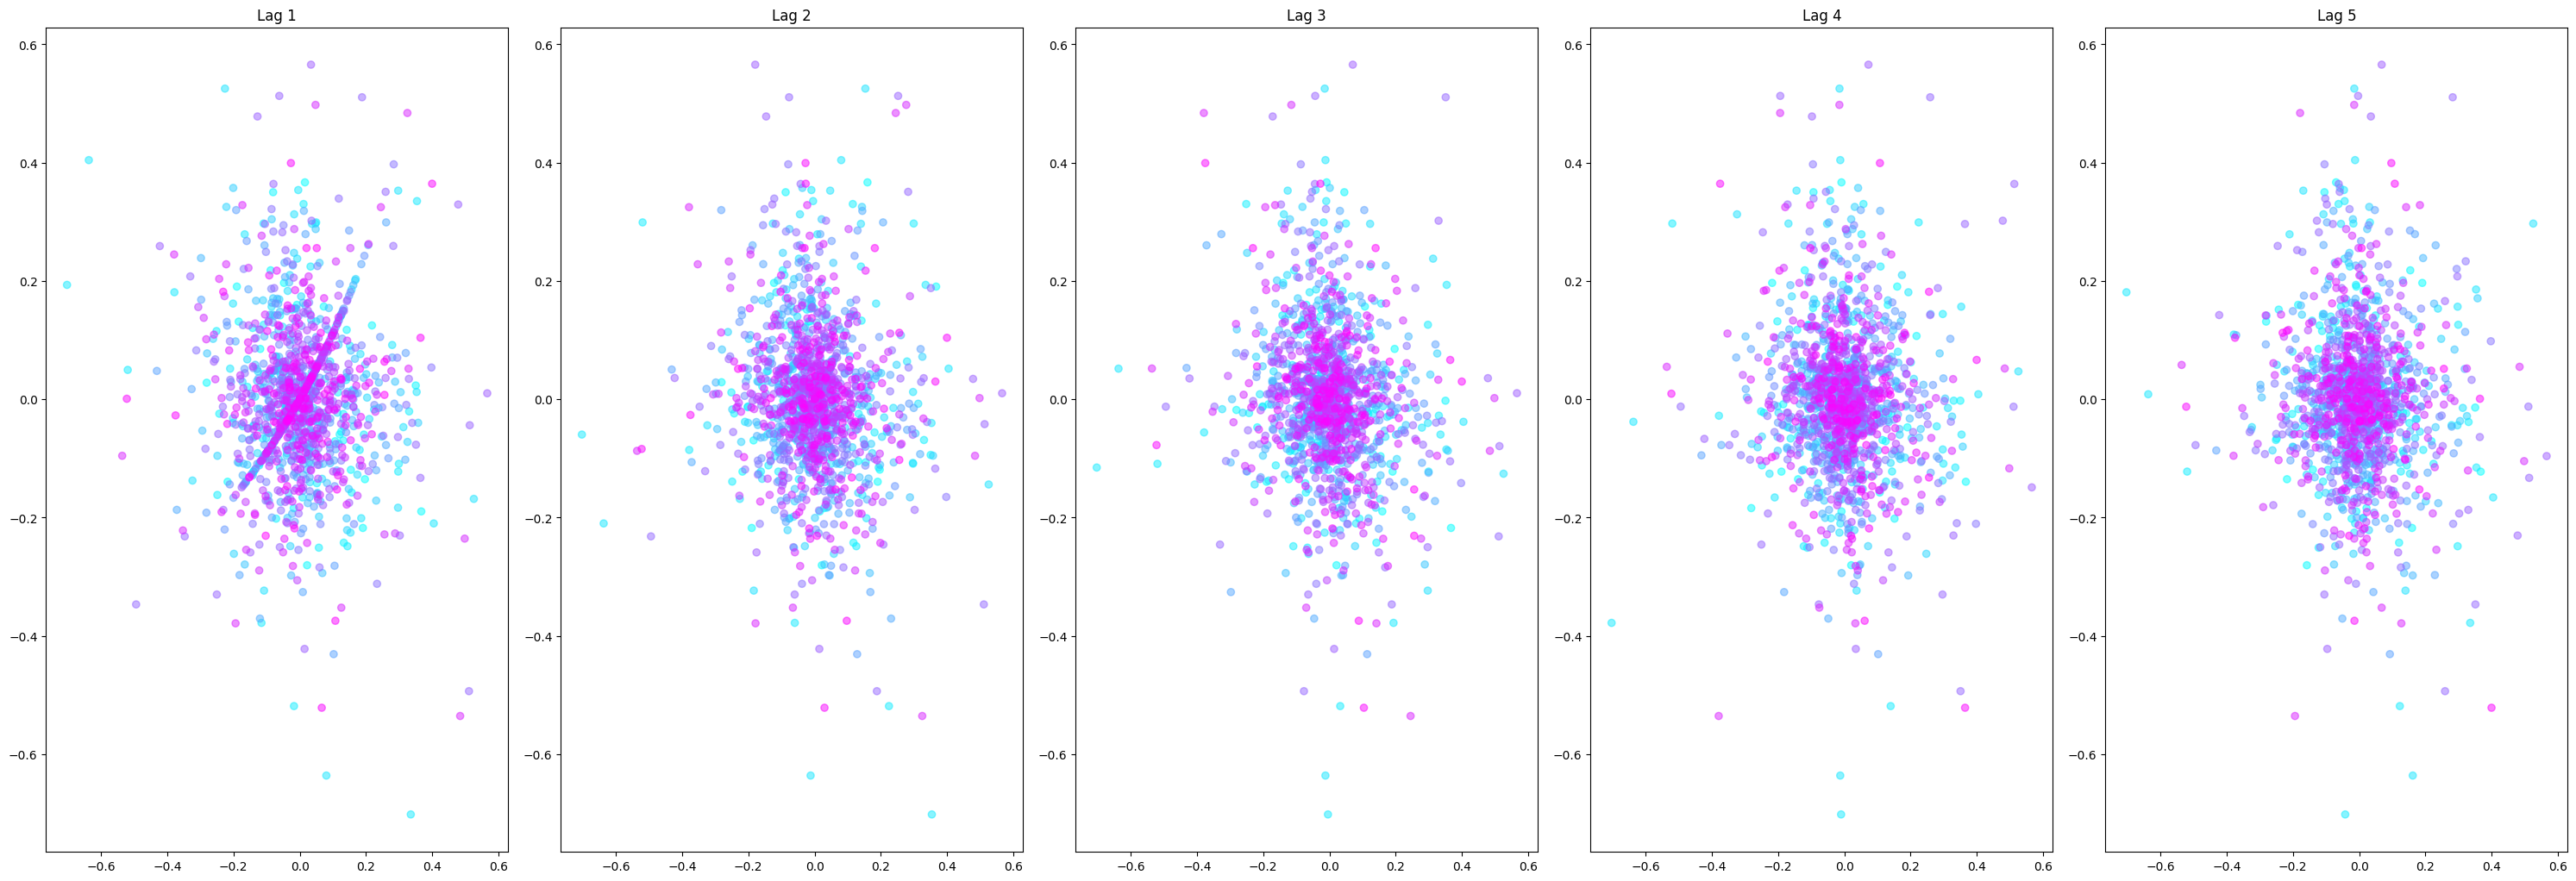

In [ ]:
# Ajusta el tamaño de la figura
plt.figure(figsize=(30, 30))
# Define cantidad de lags
cantidad_lag = 5
# Iteramos lags y creamos plots
for lag in range(1, cantidad_lag + 1):
    # Crea una nueva columna con el lag correspondiente
    clima_diferenciado['lag_{}'.format(lag)] = clima_diferenciado['humidity'].shift(lag)



    # Crea un scatterplot para el lag actual
    plt.subplot(3, cantidad_lag, lag)
    plt.scatter(clima_diferenciado['humidity'], clima_diferenciado['lag_{}'.format(lag)] ,c=np.arange(len(clima_diferenciado)),cmap= "cool", alpha=0.5)
    plt.title('Lag {}'.format(lag))

#Espacios
plt.tight_layout()
plt.show()